<a href="https://colab.research.google.com/github/KBKAKHIL/123/blob/master/Group2_DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
Ikmî6h6hh9j0pmnòlļķo

 Çimport numpy as np
import pandas as pd
import matplotlib as mpl
import csv
import matplotlib.pyplot as plt
import pydot
import io
import seaborn as sns
mpl.style.use('ggplot')
%matplotlib inline
import matplotlib.patches as mpatches
from PIL import Image
!pip install seaborn wordcloud
!pip install pywaffle
from pywaffle import Waffle
import wordcloud
from wordcloud import WordCloud, STOPWORDS
print('Matplotlib version: ', mpl.__version__)
print('Seaborn version: ', sns.__version__)
print('WordCloud version: ', wordcloud.__version__)

Matplotlib version:  3.7.1
Seaborn version:  0.12.2
WordCloud version:  1.9.2


**Importing Data**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Top-100 Trending Books.csv to Top-100 Trending Books.csv


Readind Data using Pandas Dataframe and checking how entries are in our Dataset

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Top-100 Trending Books.csv']))
print('Data read into a pandas dataframe!')
df.shape

Data read into a pandas dataframe!


(100, 8)

In [ ]:
df.head()

,Rank,book title,book price,rating,author,year of publication,genre,url
0,1,"Iron Flame (The Empyrean, 2)",18.42,4.1,Rebecca Yarros,2023,Fantasy Romance,amazon.com/Iron-Flame-Empyrean-Rebecca-Yarros/...
1,2,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...
2,3,My Name Is Barbra,31.50,4.5,Barbra Streisand,2023,Autobiography,amazon.com/My-Name-Barbra-Streisand/dp/0525429...
3,4,"Friends, Lovers, and the Big Terrible Thing: A...",23.99,4.4,Matthew Perry,2023,Memoir,amazon.com/Friends-Lovers-Big-Terrible-Thing/d...
4,5,How to Catch a Turkey,5.65,4.8,Adam Wallace,2018,"Childrens, Fiction",amazon.com/How-Catch-Turkey-Adam-Wallace/dp/14...


**Visualizing Data using Matplotlib**

In [ ]:
df.set_index('Rank', inplace=True)

In [ ]:
df.head(3)

,book title,book price,rating,author,year of publication,genre,url
Rank,,,,,,,
1,"Iron Flame (The Empyrean, 2)",18.42,4.1,Rebecca Yarros,2023,Fantasy Romance,amazon.com/Iron-Flame-Empyrean-Rebecca-Yarros/...
2,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...
3,My Name Is Barbra,31.50,4.5,Barbra Streisand,2023,Autobiography,amazon.com/My-Name-Barbra-Streisand/dp/0525429...


In [ ]:
print('data dimensions:', df.shape)

data dimensions: (100, 7)


**Vertical Box Plot**


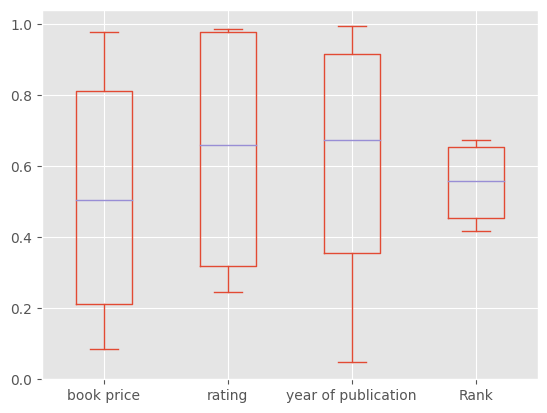

In [ ]:
df_box = pd.DataFrame(data= np.random.random(size=(4,4)), columns=['book price','rating','year of publication','Rank'])
df_box.plot(kind='box')
plt.show()

**Horizontal Box Plot**

<Axes: >

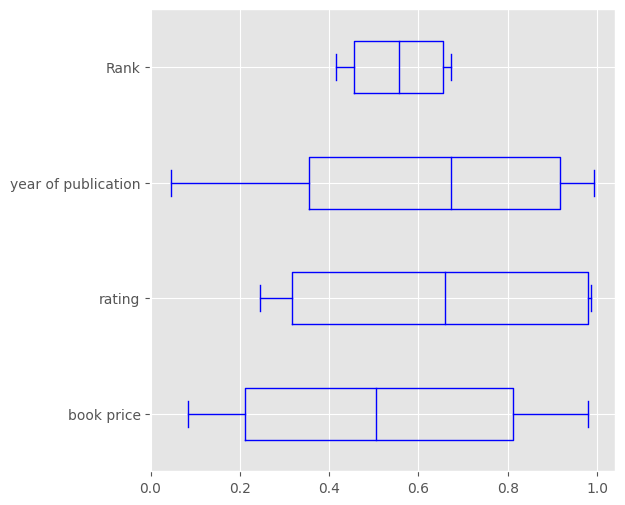

In [ ]:
df_box.plot(kind='box', figsize=(6, 6), color='blue', vert=False)

Group by Year of publication using GroupBy() Function


In [ ]:
df_year = df.groupby('book title', axis=0).sum()
df_year.head(10)


<ipython-input-20-f5a0cff11ecf>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_year = df.groupby('book title', axis=0).sum()


,book price,rating,year of publication
book title,,,
"A Court of Mist and Fury (A Court of Thorns and Roses, 2)",12.79,4.8,2016
"A Court of Thorns and Roses (A Court of Thorns and Roses, 1)",8.89,4.6,2015
A Court of Thorns and Roses Paperback Box Set (5 books),48.77,4.8,2021
"A Court of Wings and Ruin (A Court of Thorns and Roses, 3)",11.56,4.8,2017
A Little Life,11.83,4.5,2015
All the Light We Cannot See: A Novel,11.98,4.5,2014
Atomic Habits: An Easy & Proven Way to Build Good Habits & Break Bad Ones,13.79,4.8,2018
Balloons over Broadway: The True Story of the Puppeteer of Macy's Parade (Bank Street College of Education Flora Stieglitz St,12.19,4.9,1967
"Brown Bear, Brown Bear, What Do You See?",4.94,4.9,1967


In [ ]:
df_year.shape

(99, 3)

Number of Books sold every year

In [58]:
df_num = df['year of publication'].value_counts().rename_axis('Year').to_frame('totalbooks')
df_num.head()

,totalbooks
Year,
2023,28
2022,8
2018,8
2021,6
2017,5


**WAFFLE CHARTS**

In [ ]:
width = 5 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print(f'Total number of tiles is {total_num_tiles}.')

Total number of tiles is 50.


**Plotting with Seaborn**

In [ ]:
df['year of publication'].unique()

array([2023, 2018, 2017, 2014, 2020, 1960, 1998, 2022, 2009, 2015, 2013,
       2011, 2021, 1967, 1997, 1969, 2019, 1947, 1989, 2016, 1994, 1980,
       2024, 2008, 2005, 1999, 1982, 2010, 1987])

**Countplot**

<Axes: xlabel='year of publication', ylabel='count'>

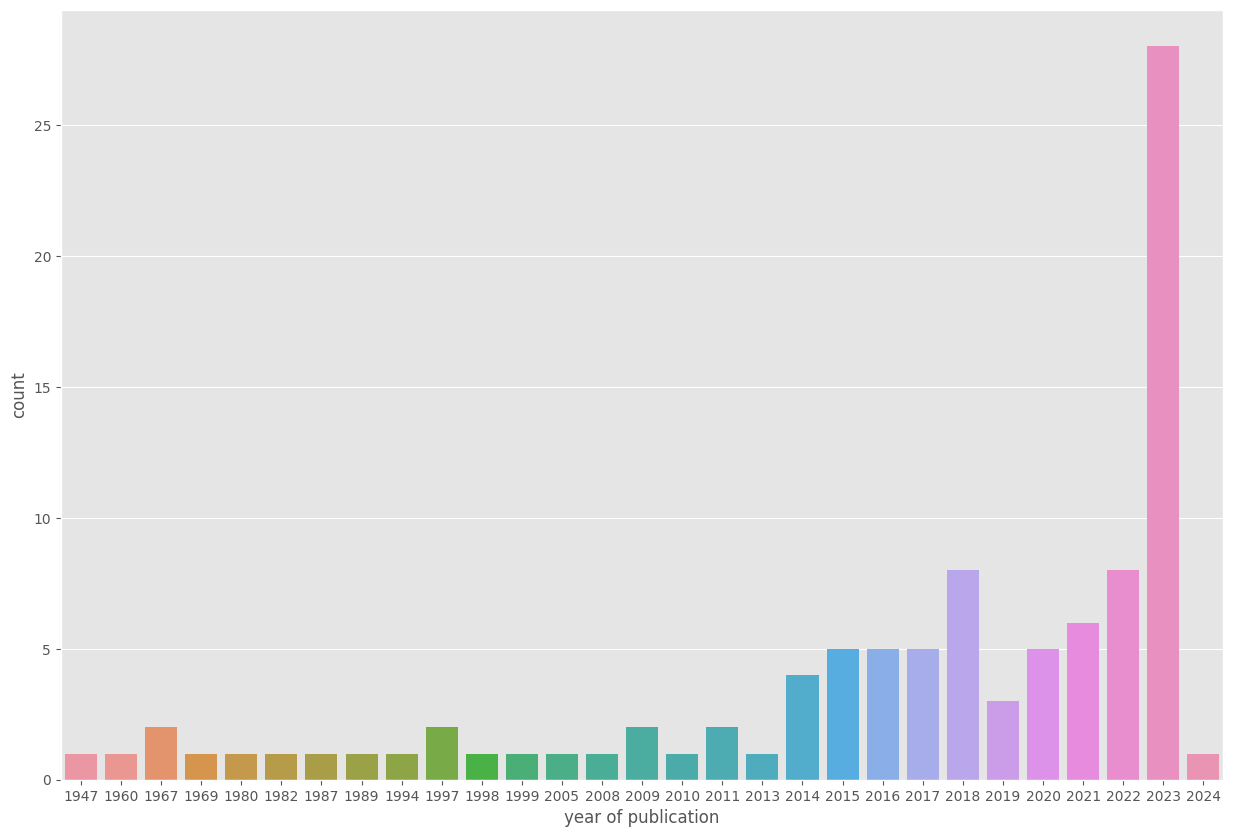

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x='year of publication', data=df)


**Regression Plot**

<Axes: xlabel='rating', ylabel='book price'>

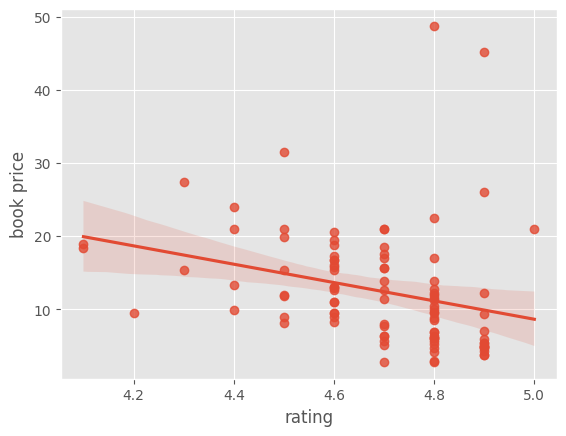

In [ ]:
sns.regplot(x='rating',y='book price',data=df)